In [ ]:
import numpy as np
from scipy.optimize import differential_evolution
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
def ackley(x):
    arg1 = -0.2 * np.sqrt(0.5 * (x[0] ** 2 + x[1] ** 2))
    arg2 = 0.5 * (np.cos(2. * np.pi * x[0]) + np.cos(2. * np.pi * x[1]))
    return -20. * np.exp(arg1) - np.exp(arg2) + 20. + np.e

# Метод дифференциальной эволюции

## При фиксированном seed=42 поэкспериментируйте с параметрами алгоритма differential_evolution: strategy, popsize, mutation.

In [ ]:
bounds = [(-10, 10), (-10, 10)]

result = differential_evolution(ackley, bounds, seed=42)
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 2793
     nit: 90
 success: True
       x: array([0., 0.])

In [ ]:
result = differential_evolution(ackley, bounds, seed=42, popsize = 15 , strategy = 'best1exp' , mutation = ( 0.5 , 1,0 ))
result
# при изменении strategy - кол-во итераций увеличивается

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 4503
     nit: 147
 success: True
       x: array([0., 0.])

In [ ]:
result = differential_evolution(ackley, bounds, seed=42, popsize = 15 , strategy = 'rand1exp' , mutation = ( 0.5 , 1,0 ))
result
# ещё увеличивается

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 7473
     nit: 246
 success: True
       x: array([0., 0.])

In [ ]:
result = differential_evolution(ackley, bounds, seed=42, popsize = 15 , strategy = 'currenttobest1exp', mutation = ( 0.5 , 1,0 ))
result
# неудачная попытка

     fun: 4.440892098500626e-16
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 30093
     nit: 1000
 success: False
       x: array([0., 0.])

In [ ]:
result = differential_evolution(ackley, bounds, seed=42, popsize = 90 , strategy = 'currenttobest1exp', mutation = ( 0.3 , 1,0 ))
result
# неудачная попытка

     fun: 4.440892098500626e-16
 message: 'Maximum number of iterations has been exceeded.'
    nfev: 180243
     nit: 1000
 success: False
       x: array([0., 0.])

In [ ]:
result = differential_evolution(ackley, bounds, seed=42, popsize = 15 , strategy = 'randtobest1exp' , mutation = ( 0.5 , 1,0 ))
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 4773
     nit: 156
 success: True
       x: array([0., 0.])

In [ ]:
result = differential_evolution(ackley, bounds, seed=42, popsize = 15 , strategy = 'best2bin' , mutation = ( 0.5 , 1,0 ))
result

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 5073
     nit: 166
 success: True
       x: array([0., 0.])

In [ ]:
result = differential_evolution(ackley, bounds, seed=42, popsize = 8 , strategy = 'best2bin' , mutation = ( 0.8 , 1,0 ))
result
# при более низких значениях popsize и mutation - кол-во итераций увеличивается

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3695
     nit: 226
 success: True
       x: array([0., 0.])

In [ ]:
result = differential_evolution(ackley, bounds, seed=42, strategy = 'best2bin', popsize = 120, mutation = ( 0.3 , 1,0 ))
result
# при более высоких значениях popsize и mutation - кол-во итераций уменьшается

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 30783
     nit: 127
 success: True
       x: array([0., 0.])

In [ ]:
result = differential_evolution(ackley, bounds, seed=42, popsize = 80, mutation = ( 0.3 , 1,0 ))
result
# низкое кол-во итераций, но много обращений к целевой функции

     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 11423
     nit: 70
 success: True
       x: array([0., 0.])

In [ ]:
# распараллеливание
result = differential_evolution(ackley, bounds, updating='deferred', workers=2)
result


     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 3843
     nit: 125
 success: True
       x: array([0., 0.])

## Постройте графики количества итераций (nit) оптимизации функции ackley от значения параметра.

In [ ]:
res = differential_evolution(ackley, bounds, seed=42,x0=0)
res1 = differential_evolution(ackley, bounds, seed=42,x0=0.5)
res2 = differential_evolution(ackley, bounds, seed=42,x0=1)
res3 = differential_evolution(ackley, bounds, seed=42,x0=1.5)
res4 = differential_evolution(ackley, bounds, seed=42,x0=2)
res5 = differential_evolution(ackley, bounds, seed=42,x0=2.5)
res6 = differential_evolution(ackley, bounds, seed=42,x0=3)
res7 = differential_evolution(ackley, bounds, seed=42,x0=3.5)
res8 = differential_evolution(ackley, bounds, seed=42,x0=4)
res.nit,res1.nit,res2.nit,res3.nit,res4.nit,res5.nit,res6.nit,res7.nit,res8.nit

(88, 87, 94, 93, 94, 94, 89, 98, 93)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

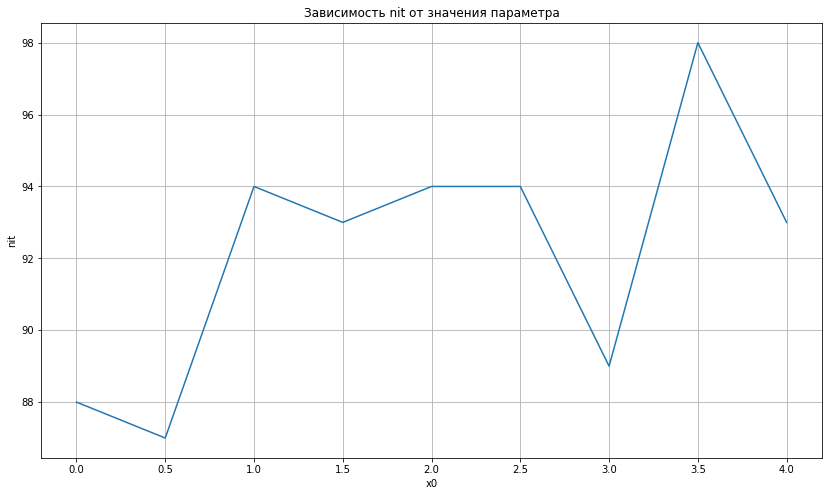

In [ ]:
fig=plt.figure(figsize=(14,8))
ax=fig.gca()
ax.set_xlabel('x0')
ax.set_ylabel('nit')
# ax.set_zlabel('y')
ax.set_title('Зависимость nit от значения параметра')
ax.grid (0.5)

x=[0,0.5,1,1.5,2,2.5,3,3.5,4]
y=[res.nit,res1.nit,res2.nit,res3.nit,res4.nit,res5.nit,res6.nit,res7.nit,res8.nit]
ax.plot(x,y)



# Поэкспериментируйте с параметрами и оптимизацией через minimize:

In [ ]:
from scipy.optimize import minimize

x0 = [0,0]

result_m = minimize(ackley, x0,  method='Nelder-Mead')
result_m

 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

In [ ]:
# тот же метод с опцией окончания поиска
result_m = minimize(ackley, x0,  method='Nelder-Mead', options={'xtd':-1e-8})
result_m

<ipython-input-8-8f53403d3364>:2: OptimizeWarning: Unknown solver options: xtd
  result_m = minimize(ackley, x0,  method='Nelder-Mead', options={'xtd':-1e-8})


 final_simplex: (array([[ 0.00000000e+00,  0.00000000e+00],
       [-1.60675049e-05, -8.45336914e-06],
       [-1.40380859e-06, -3.11279297e-05]]), array([4.44089210e-16, 5.13604405e-05, 8.81584216e-05]))
           fun: 4.440892098500626e-16
       message: 'Optimization terminated successfully.'
          nfev: 17
           nit: 8
        status: 0
       success: True
             x: array([0., 0.])

In [ ]:
# Метод по умолчанию
result_m = minimize(ackley, x0)
result_m

      fun: 4.440892098500626e-16
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([2.82842755, 2.82842755])
  message: 'Desired error not necessarily achieved due to precision loss.'
     nfev: 165
      nit: 0
     njev: 51
   status: 2
  success: False
        x: array([0., 0.])

In [ ]:
result_m = minimize(ackley, x0, method='BFGS', jac=ackley, options={'gtol': 1e-6, 'disp': True})
result_m

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 0
         Function evaluations: 1
         Gradient evaluations: 1


      fun: 4.440892098500626e-16
 hess_inv: array([[1, 0],
       [0, 1]])
      jac: array([4.4408921e-16])
  message: 'Optimization terminated successfully.'
     nfev: 1
      nit: 0
     njev: 1
   status: 0
  success: True
        x: array([0., 0.])

In [ ]:
result_m = minimize(ackley, x0,  method='Powell')
result_m

   direc: array([[1., 0.],
       [0., 1.]])
     fun: 4.440892098500626e-16
 message: 'Optimization terminated successfully.'
    nfev: 63
     nit: 1
  status: 0
 success: True
       x: array([0., 0.])

In [ ]:
# Минимизация скалярной функции одной или нескольких переменных с помощью алгоритма сопряженных градиентов.
result_m = minimize(ackley, x0, method='CG', jac=ackley)
result_m

     fun: 4.440892098500626e-16
     jac: array([4.4408921e-16])
 message: 'Optimization terminated successfully.'
    nfev: 1
     nit: 0
    njev: 1
  status: 0
 success: True
       x: array([0., 0.])